## Sentimental Analysis on Amazon product textual reviews.
#### - By NIKITA UDAYSING PATIL.

In [1]:
# import libraries 
import numpy as np
import  pandas as pd
import warnings
warnings.filterwarnings('ignore')
from textblob  import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# pip install nltk
import os
import nltk 
import nltk.corpus
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords 
from nltk import sent_tokenize, word_tokenize
from bs4 import BeautifulSoup 
import re
!pip install wordcloud
from wordcloud import WordCloud


In [2]:
data=pd.read_excel(r'iphone data.xlsx')
data

,index,review_country,reviewed_at,review_text,review_rating
0,0,India,2018-12-12,NOTE:,3.0 out of 5 stars
1,1,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars
2,2,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars
3,3,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars
4,4,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars
...,...,...,...,...,...
5005,5005,India,2019-11-13,Dhamaka,4.0 out of 5 stars
5006,5006,India,2019-11-15,Goodbye,4.0 out of 5 stars
5007,5007,India,2019-12-29,Nothing,5.0 out of 5 stars
5008,5008,India,2019-11-10,Superbb,5.0 out of 5 stars


In [3]:
data.describe()

,index
count,5010.000000
mean,2504.500000
std,1446.406755
min,0.000000
25%,1252.250000
50%,2504.500000
75%,3756.750000
max,5009.000000


In [4]:
data.review_country.value_counts()
data.isnull().any().sum()

1

In [5]:
data1=data.dropna()
data1

,index,review_country,reviewed_at,review_text,review_rating
0,0,India,2018-12-12,NOTE:,3.0 out of 5 stars
1,1,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars
2,2,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars
3,3,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars
4,4,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars
...,...,...,...,...,...
5005,5005,India,2019-11-13,Dhamaka,4.0 out of 5 stars
5006,5006,India,2019-11-15,Goodbye,4.0 out of 5 stars
5007,5007,India,2019-12-29,Nothing,5.0 out of 5 stars
5008,5008,India,2019-11-10,Superbb,5.0 out of 5 stars


In [6]:
data1.review_rating.value_counts()

5.0 out of 5 stars    3730
4.0 out of 5 stars     718
1.0 out of 5 stars     319
3.0 out of 5 stars     153
2.0 out of 5 stars      87
Name: review_rating, dtype: int64

In [7]:
data1['review_rating']=data['review_rating'].replace(['5.0 out of 5 stars'],'5')
data1['review_rating']=data1['review_rating'].replace(['4.0 out of 5 stars'],'4')
data1['review_rating']=data1['review_rating'].replace(['3.0 out of 5 stars'],'3')
data1['review_rating']=data1['review_rating'].replace(['2.0 out of 5 stars'],'2')
data1['review_rating']=data1['review_rating'].replace(['1.0 out of 5 stars'],'1')
data1


,index,review_country,reviewed_at,review_text,review_rating
0,0,India,2018-12-12,NOTE:,3
1,1,India,2018-11-17,Very bad experience with this iPhone xr phone....,1
2,2,India,2019-01-27,Amazing phone with amazing camera coming from ...,5
3,3,India,2019-05-02,So I got the iPhone XR just today. The product...,1
4,4,India,2019-05-24,I've been an android user all my life until I ...,5
...,...,...,...,...,...
5005,5005,India,2019-11-13,Dhamaka,4
5006,5006,India,2019-11-15,Goodbye,4
5007,5007,India,2019-12-29,Nothing,5
5008,5008,India,2019-11-10,Superbb,5


In [8]:
print("Summary statistics of numerical features : \n", data1.describe())

print("\nTotal number of reviews: ",len(data1))



Summary statistics of numerical features : 
              index
count  5007.000000
mean   2503.578191
std    1446.164582
min       0.000000
25%    1251.500000
50%    2503.000000
75%    3755.500000
max    5009.000000

Total number of reviews:  5007


In [9]:
data1.dtypes


index                      int64
review_country            object
reviewed_at       datetime64[ns]
review_text               object
review_rating             object
dtype: object

# Step 1: Data Visualization.

Text(0, 0.5, 'Count')

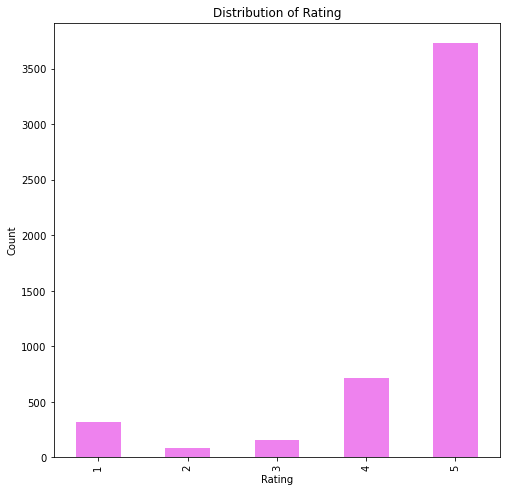

In [10]:
# Plot distribution of rating
plt.figure(figsize=(8,8))
# sns.countplot(df['Rating'])
data1['review_rating'].value_counts().sort_index().plot(kind='bar',color='violet')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

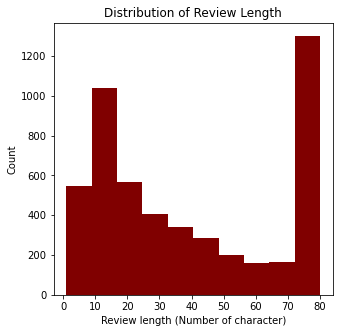

In [11]:
# Plot distribution of text_review length
review_length = data1["review_text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(5,5))
review_length.loc[review_length < 100].hist(color='maroon',grid=False)
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

In [12]:
# Plot distribution of rating
#plt.figure(figsize=(18,8))
# sns.countplot(df['Rating'])
#data1['reviewed_at'].value_counts().sort_index().plot(kind='bar',color='violet')
#plt.title('Distribution of Rating')
#plt.xlabel('Rating')
#plt.ylabel('Count')

# Step 2: Data Preparation

For illustrative purpose, to find polarity of given "review_text" I use TextBlob. After that I converted it into 'positive_sentiment' as (1) when "sentiment_polarity > 0" and 'negative_sentiment' as (0) when " sentiment_polarity < 0 " . Also I drop reviews contain "sentiment_polarity == 0" because it is referred as 'neutral'.

# Prepare Data

In [13]:
def find_pol(review_rating):
    return TextBlob(review_rating).sentiment.polarity
data1['sentiment_polarity'] = data1['review_text'].apply(find_pol)
data1.head()

,index,review_country,reviewed_at,review_text,review_rating,sentiment_polarity
0,0,India,2018-12-12,NOTE:,3,0.000000
1,1,India,2018-11-17,Very bad experience with this iPhone xr phone....,1,-0.455000
2,2,India,2019-01-27,Amazing phone with amazing camera coming from ...,5,0.666667
3,3,India,2019-05-02,So I got the iPhone XR just today. The product...,1,0.050000
4,4,India,2019-05-24,I've been an android user all my life until I ...,5,0.000000


In [14]:
most_negative = data1[data1.sentiment_polarity <0].review_text
print(most_negative)



1       Very bad experience with this iPhone xr phone....
7       The phone is hanging. Video quality is not ver...
11      Very bad experience with this iPhone xr phone....
17      The phone is hanging. Video quality is not ver...
27      Single SIM is working fine but if you are usin...
                              ...                        
4817                                 bad n faulty product
4919                                            Not worth
4988                                      Bill is missing
4993                                                  Bad
4998                                Call quality is worst
Name: review_text, Length: 316, dtype: object


In [15]:
most_positive = data1[data1.sentiment_polarity >0].review_text
print(most_positive)

2       Amazing phone with amazing camera coming from ...
3       So I got the iPhone XR just today. The product...
8       I'll use this review to mostly say what I'm no...
12      Amazing phone with amazing camera coming from ...
13      So I got the iPhone XR just today. The product...
                              ...                        
5000                                              Super..
5001                                              Awesome
5002                                              Awesome
5003                                              awesome
5004                                              Awesome
Name: review_text, Length: 3780, dtype: object


In [16]:
 
# Drop missing values
data1.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 0
data2 = data1[data1['sentiment_polarity'] != 0]
data2
# Encode  1 as (positive sentiment) and  0  as (negative sentiment)
data1['sentiment'] = np.where(data1['sentiment_polarity'] < 0, 0, 1)
data1

,index,review_country,reviewed_at,review_text,review_rating,sentiment_polarity,sentiment
0,0,India,2018-12-12,NOTE:,3,0.000000,1
1,1,India,2018-11-17,Very bad experience with this iPhone xr phone....,1,-0.455000,0
2,2,India,2019-01-27,Amazing phone with amazing camera coming from ...,5,0.666667,1
3,3,India,2019-05-02,So I got the iPhone XR just today. The product...,1,0.050000,1
4,4,India,2019-05-24,I've been an android user all my life until I ...,5,0.000000,1
...,...,...,...,...,...,...,...
5005,5005,India,2019-11-13,Dhamaka,4,0.000000,1
5006,5006,India,2019-11-15,Goodbye,4,0.000000,1
5007,5007,India,2019-12-29,Nothing,5,0.000000,1
5008,5008,India,2019-11-10,Superbb,5,0.000000,1


# Train Test Split

In [17]:
# Split data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(data1['review_text'], data1['sentiment'], 
                                                    test_size=0.20, random_state=0)


In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4005,), (1002,), (4005,), (1002,))

# Step 3: Bag of Word

The main aim of this project is to classify reviews in textual format into positive and negative sentiment. So there are two steps needed. Firstly we find word embedding convert textual reviews in numerical representation and secondly,then fit supervised machine learning algorithms on that numerical representation.

Word embedding is frequency based embedding such as Bag of Words (BoW) model. This model learns a vocubulary list from a given corpus and represent each document based on some counting methods of words.In this part,we will explore the model using BoW with SVM algorithms.

The following steps of workflow:

* step 1: preprocess raw text_reviews into clean one.
* step 2: Create Bow using CountVectorizer / Tfidfvectorizer in sklearn.
* step 3: Transform review text to numerical representations
* step 4: Fit SVM algorithm (e.g Naive Bayes,Logistic regression, etc.)
* step 5: Improve the model performance by GridSearch

# Text Preprocessing

The following steps are implemented to convert raw text_reviews into clean text_reviews.

* Remove Html tags using BeautifulSoup.
* Remove non_character such as digits and symbols.
* Convert uppercase letters into lowercase.
* Remove stop words such as "the", "and" .....
* Convert root word by stemming.

In [19]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words)) 

In [20]:
cleanText(raw_text=data.review_text[5], remove_stopwords=True, stemming=True, split_text=True, \
             )

['deliv', 'phone', 'work', 'immedi', 'remov', 'bo']

In [21]:
# Preprocess text data in training set and testing set
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[5])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 great quality superb performance


# CountVectorizer with Multinomial Naive Bayes 
(Benchmark Model)

Now our text_reviews are cleaned !! The next step is to convert them into numerical representations for SVM algorithm.
In sklearn library , we can use CountVectorizer which implements both tokenization and counting in a single class.

In [22]:
# Fit and transform the training data to a document-term matrix using CountVectorizer
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names())) 
print("Show some feature names : \n", countVect.get_feature_names()[::100])


Number of features : 2421 

Show some feature names : 
 ['able', 'anytime', 'becomes', 'calls', 'completed', 'defect', 'drains', 'existing', 'five', 'grabbed', 'hot', 'issue', 'literally', 'mentione', 'notice', 'particular', 'prev', 'receiver', 'sa', 'should', 'sr', 'telephoto', 'type', 'want', 'xiaomi']


In [23]:
# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

MultinomialNB()

In [24]:
X_train_countVect

<4005x2421 sparse matrix of type '<class 'numpy.int64'>'
	with 26202 stored elements in Compressed Sparse Row format>

In [25]:
X_train_countVect.shape, y_train.shape

((4005, 2421), (4005,))

In [26]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [27]:
# Evaluate the model on validaton set
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.9381

AUC score : 0.6024

Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.21      0.33        71
           1       0.94      0.99      0.97       931

    accuracy                           0.94      1002
   macro avg       0.83      0.60      0.65      1002
weighted avg       0.93      0.94      0.92      1002


Confusion Matrix : 
 [[ 15  56]
 [  6 925]]


# TfidfVectorizer with Logistic Regression.


Some words might frequently apper but have meaningful information about the sentiment of a particular review.Insted of using occurance counting,we can use tf-idf transform to scale down the impact of frequntly words in given corpus.

In sklearn library,we can use TfidVectorizer which implements both tokenization and ti-idf weighted counting on a single class.

In [28]:
# Fit and transform the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) 
print("Show some feature names : \n", tfidf.get_feature_names()[::100])



Number of features : 562 

Show some feature names : 
 ['10', 'classy', 'free', 'many', 'range', 'upgrade']


In [29]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
X_train_tfidf.shape, y_train.shape

((4005, 562), (4005,))

In [30]:
# Look at the top 10 features with smallest and the largest coefficients
feature_names = np.array(tfidf.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:100]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['not' 'bad' 'worst' 'poor' 'disappointed' 'slow' 'little' 'missing'
 'other' 'heavy' 'black' 'expensive' 'expected' 'average' 'less' 'any'
 'of' 'big' 'usual' 'voice' 'box' 'don' 'or' 'slight' 'side' 'out' 'was'
 'quality' 'long' 'too' 'available' 'as' 'that' 'very' 'sim' 'few' 'than'
 'receive' 'an' 'month' 'weight' 'be' 'single' 'times' 'and' 'while'
 'water' 'to' 'damaged' 'service' 'sure' 'same' 'there' 'screen' 'front'
 'camera' 'experience' 'video' 'charging' 'is' 'touch' 'make' 'never'
 'should' 'connector' 'pho' 'drop' 'xs' 'want' 'size' 'line' 'over'
 'still' 'adapter' '6s' 'ordered' 'why' 'lightning' 'enough' 'slightly'
 'today' 'problem' 'after' 'review' 'if' 'the' 'sometimes' 'within' 'also'
 'usage' 'stopped' 'takes' 'taking' 'hanging' 'from' 'bit' 'faulty' 'down'
 'months' 'completely']

Top 10 features with largest coefficients : 
['good' 'best' 'awesome' 'great' 'excellent' 'nice' 'amazing' 'superb'
 'phone' 'my']


In [31]:
# Evaluate on the validaton set
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.9371

AUC score : 0.5693

Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.14      0.24        71
           1       0.94      1.00      0.97       931

    accuracy                           0.94      1002
   macro avg       0.89      0.57      0.60      1002
weighted avg       0.93      0.94      0.92      1002


Confusion Matrix : 
 [[ 10  61]
 [  2 929]]


# pipeline and GridSearch


In sklearn library,we can build pipeline to stremline the workflow and use GridSearch on the pipline model to implememt hyper_parameter tuning for both vectorizer and classifier in one go!!

In [32]:
# Building a pipeline
estimators = [("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())]
model = Pipeline(estimators)

In [33]:
# Grid search
params = {"lr__C":[0.1, 1, 10], #regularization param of logistic regression
          "tfidf__min_df": [1, 5], #min count of words 
          "tfidf__max_features": [10, None], #max features
          "tfidf__ngram_range": [(1,1), (1,2)], #1-grams or 2-grams
          "tfidf__stop_words": [None, "english"]} #use stopwords or don't

grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_cleaned, y_train)
print("The best paramenter set is : \n", grid.best_params_)



The best paramenter set is : 
 {'lr__C': 10, 'tfidf__max_features': None, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}


In [34]:
# Evaluate on the validaton set
predictions = grid.predict(X_test_cleaned)
modelEvaluation(predictions)


Accuracy on validation set: 0.9521

AUC score : 0.7010

Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.41      0.55        71
           1       0.96      0.99      0.97       931

    accuracy                           0.95      1002
   macro avg       0.89      0.70      0.76      1002
weighted avg       0.95      0.95      0.94      1002


Confusion Matrix : 
 [[ 29  42]
 [  6 925]]


# Step 4: Word Cloud

In this part,we use word cloud to get an bunch of words most appear in text_review.so I again preprocess and clean the raw text_reviews into clean ones.

Here I combine all text_reviews in one variable to get easy further.

In [35]:
data2.head()

,index,review_country,reviewed_at,review_text,review_rating,sentiment_polarity
1,1,India,2018-11-17,Very bad experience with this iPhone xr phone....,1,-0.455000
2,2,India,2019-01-27,Amazing phone with amazing camera coming from ...,5,0.666667
3,3,India,2019-05-02,So I got the iPhone XR just today. The product...,1,0.050000
7,7,India,2018-11-25,The phone is hanging. Video quality is not ver...,1,-0.269231
8,8,India,2019-04-27,I'll use this review to mostly say what I'm no...,4,0.333333


In [38]:
x=', '.join(most_negative)
x

"Very bad experience with this iPhone xr phone. Back camera found defective and n, The phone is hanging. Video quality is not very good., Very bad experience with this iPhone xr phone. Back camera found defective and n, The phone is hanging. Video quality is not very good., Single SIM is working fine but if you are using E-sim in this phone. Not good qu, It is not supporting any type of sim.. the network gets disconnected after somet, i always was unhappy with the size of my previous iPhones (iPhone 7 and 5s), I b, NEVER BUY it from Amazon. VERY POOR PRODUCT AND CUSTOMER CARE.i bought it and re, I was skeptical looking at some XR reviews and also purchasing an iPhone off Ama, I am not able to activate iphone after several attempts. Today only i purchased., Received the product next day only but packaging was not good as it is a cellpho, Don’t get swayed by some lame reviewers on YouTube. If u r holding out for an iP, Iphone not working since I opened the box. Apple support of little he

In [39]:
text=x.lower() # lowercase letters
print(text)

very bad experience with this iphone xr phone. back camera found defective and n, the phone is hanging. video quality is not very good., very bad experience with this iphone xr phone. back camera found defective and n, the phone is hanging. video quality is not very good., single sim is working fine but if you are using e-sim in this phone. not good qu, it is not supporting any type of sim.. the network gets disconnected after somet, i always was unhappy with the size of my previous iphones (iphone 7 and 5s), i b, never buy it from amazon. very poor product and customer care.i bought it and re, i was skeptical looking at some xr reviews and also purchasing an iphone off ama, i am not able to activate iphone after several attempts. today only i purchased., received the product next day only but packaging was not good as it is a cellpho, don’t get swayed by some lame reviewers on youtube. if u r holding out for an ip, iphone not working since i opened the box. apple support of little hel

In [40]:
allstopwords=stopwords.words('english')
filtered_text=text

tokenized_text=word_tokenize(filtered_text)
review_text=[word for word in tokenized_text if not word in allstopwords]
print(review_text)


['bad', 'experience', 'iphone', 'xr', 'phone', '.', 'back', 'camera', 'found', 'defective', 'n', ',', 'phone', 'hanging', '.', 'video', 'quality', 'good.', ',', 'bad', 'experience', 'iphone', 'xr', 'phone', '.', 'back', 'camera', 'found', 'defective', 'n', ',', 'phone', 'hanging', '.', 'video', 'quality', 'good.', ',', 'single', 'sim', 'working', 'fine', 'using', 'e-sim', 'phone', '.', 'good', 'qu', ',', 'supporting', 'type', 'sim', '..', 'network', 'gets', 'disconnected', 'somet', ',', 'always', 'unhappy', 'size', 'previous', 'iphones', '(', 'iphone', '7', '5s', ')', ',', 'b', ',', 'never', 'buy', 'amazon', '.', 'poor', 'product', 'customer', 'care.i', 'bought', ',', 'skeptical', 'looking', 'xr', 'reviews', 'also', 'purchasing', 'iphone', 'ama', ',', 'able', 'activate', 'iphone', 'several', 'attempts', '.', 'today', 'purchased.', ',', 'received', 'product', 'next', 'day', 'packaging', 'good', 'cellpho', ',', '’', 'get', 'swayed', 'lame', 'reviewers', 'youtube', '.', 'u', 'r', 'holding

In [41]:
filtered_sentence=(" ").join(review_text)
filtered_sentence

"bad experience iphone xr phone . back camera found defective n , phone hanging . video quality good. , bad experience iphone xr phone . back camera found defective n , phone hanging . video quality good. , single sim working fine using e-sim phone . good qu , supporting type sim .. network gets disconnected somet , always unhappy size previous iphones ( iphone 7 5s ) , b , never buy amazon . poor product customer care.i bought , skeptical looking xr reviews also purchasing iphone ama , able activate iphone several attempts . today purchased. , received product next day packaging good cellpho , ’ get swayed lame reviewers youtube . u r holding ip , iphone working since opened box . apple support little help . amazon , bit worried authenticity buying iphone online unknown se , battery quality worst honor 8c gives 2 days backup pho , dude confused first one buy oneplus 7pro iphone xr , , purchased apple iphone xr ( 64gb ) - black use. , looking upgrade iphone 6 confused iphone 11 & iph ,

In [42]:
#letters_only 
review_text= re.sub("[^a-zA-Z]", " ",filtered_sentence )
review_text

'bad experience iphone xr phone   back camera found defective n   phone hanging   video quality good    bad experience iphone xr phone   back camera found defective n   phone hanging   video quality good    single sim working fine using e sim phone   good qu   supporting type sim    network gets disconnected somet   always unhappy size previous iphones   iphone    s     b   never buy amazon   poor product customer care i bought   skeptical looking xr reviews also purchasing iphone ama   able activate iphone several attempts   today purchased    received product next day packaging good cellpho     get swayed lame reviewers youtube   u r holding ip   iphone working since opened box   apple support little help   amazon   bit worried authenticity buying iphone online unknown se   battery quality worst honor  c gives   days backup pho   dude confused first one buy oneplus  pro iphone xr     purchased apple iphone xr     gb     black use    looking upgrade iphone   confused iphone      iph  

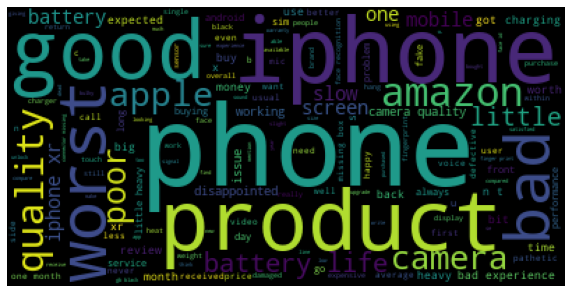

In [43]:
cloud=WordCloud(background_color="black").generate(review_text)
plt.figure(figsize=(10,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

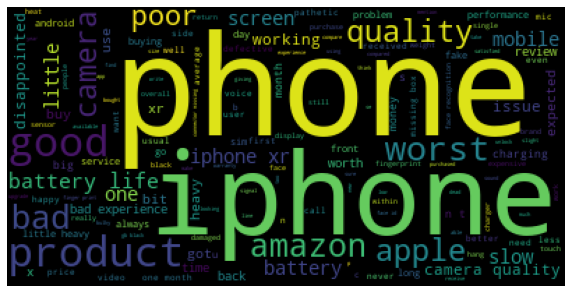

In [55]:
cloud=WordCloud(background_color="black").generate(review_text)
plt.figure(figsize=(10,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

Here I found that the words like "good","phone","camera","battery","life","excellent","awesome" and so on are frequently used in most of reviews.

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [46]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X_train_countVect,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

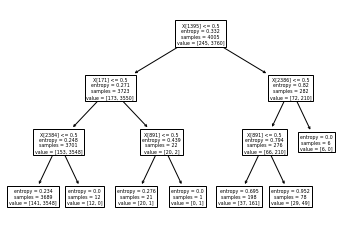

In [47]:
#Plot the Decision Tree
tree.plot_tree(model);

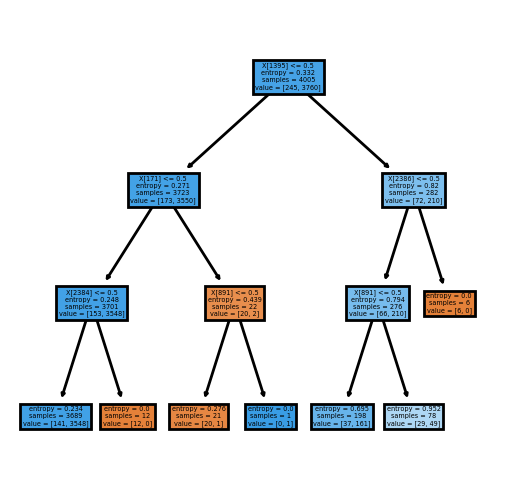

In [48]:
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=200)
tree.plot_tree(model,#feature_names=fn,class_names=cn,
               filled=True);

In [49]:
predictions = model.predict(countVect.transform(X_test_cleaned))
pd.Series(predictions).value_counts()

1    991
0     11
dtype: int64

In [50]:
y_test.value_counts()

1    931
0     71
Name: sentiment, dtype: int64

In [51]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
#Cross table as like the confusion matrix
pd.crosstab(y_test,predictions)

col_0,0,1
sentiment,,
0,11,60
1,0,931


In [53]:
#Accuracy
np.mean(predictions==y_test)

0.9401197604790419

Inference : After applying supervised learning algorithms we found that Naive Bayes gives model with accuracy 93.81% , logistics regression model gives 93.71% and Desicion Tree model gives accuracy 94.11% .  